# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**: David Diao

**ID**: ZD46

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Desktop/BEE 4750/HW/hw2-zd46`
   Installed Preferences ─────────────── v1.4.0
   Installed Libmount_jll ────────────── v2.35.0+0
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed Accessors ───────────────── v0.1.37
   Installed Xorg_xkbcomp_jll ────────── v1.4.2+4
   Installed GR_jll ──────────────────── v0.72.7+0
   Installed LoggingExtras ───────────── v1.0.0
   Installed Contour ─────────────────── v0.6.2
   Installed InlineStrings ───────────── v1.4.0
   Installed Formatting ──────────────── v0.4.2
   Installed Unitful ─────────────────── v1.14.0
   Installed ConcurrentUtilities ─────── v2.2.0
   Installed RelocatableFolders ──────── v1.0.0
   Installed Roots ───────────────────── v2.1.6
   Installed OpenSSL ─────────────────── v1.4.1
   Installed InvertedIndices ─────────── v1.3.0
   Installed Cairo_jll ───────────────── v1.16.1+1
   Installed ColorSchemes ────────────── v3.21.0
   Installed Xorg_libpthread_stubs_jll ─ v0.1.0+3
   Installed

In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

Question 1 Solution: 

Define Variabel and parameter
River

Flow rate Q_river=250,000 m³/day

Concentration C_river=0.5 kg/1000 m³ = 0.0005 kg/m³

Source 1

Flow rate Q_1=40,000 m³/day

Concentration C_1=9 kg/1000 m³ = 0.009 kg/m³

location=0 km

Source 2

Flow rate Q_2 = 60,000 m³/day

Concentration C_2 = 7kg/1000 m³ = 0.007 kg/m³

location= 15 km

River Velocity: u = 10 km/day

Decay Rate: k = 0.36 per day

Limit for CRUD Concentration: C_limit =2.5 kg/1000 m³ = 0.0025 kg/m³

Flowrate after source 1 

= Q_totalq1=Q_river+Q_1=250,000+40,000=290,000 m³/day

Mass balance = C_initial = (Q_river*C_river+Q_1*C_1)/Q_total

(250,000×0.0005+40,000×0.009)/290,000 = 0.00167241379 kg/m³

 Derive the Steady-State Model Between source1 and source2 : 
 
 C(x)=C_initial*e^(-kx/u) 
 
 k/u=0.36/10=0.036
 
 C(x)=0.001672*e^-0.036x 


Concentration just before source 2 

x(position)=15

C_w2=0.001672*e^(-0.036*15) = 0.00097435507 kg/m³


Concentration just after source 2 
Flowrate after 2 Q_total2 = 290,000+60,000 = 350,000 m³/day

Mass = 290,000*0.000974+60,000×0.007= 702.46 kg/day

702.46/350,000= 0.00200702857 kg/m³

For x>=15 km C(x)=0.00200702857*e^-0.036x 

Conclusion:

For x<15 = 0.001672*e^-0.036*x

For x>=15 = 0.00200702857*e^-0.036*x 

The maximum CRUD concentration in the river is approximately 0.002007 kg/m³, which is below the regulatory limit of 0.0025 kg/m³. Therefore the system complies with the regulatory limit for CRUD concentration.


> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

Question 2 Solution Idea: 
Calculate phosphorus recycling, outflow, and dynamics. Then, utilize a simulation process to determine equilibrium and analyze system dynamics and resilience.


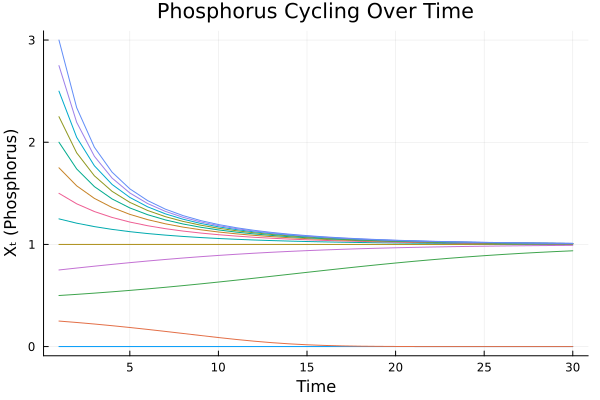

The first equilibrium occurs at X = 0.0
The second equilibrium occurs at X = 1.0


In [57]:
using Plots, Roots

function P_recycling(x, q) # Function for P_recycling, outflow, and change in C_p
    return x^q / (1 + x^q)
end

P_outflow(x, b) = b * x

function fX(x, a, b, q)
    return x + a + P_recycling(x, q) - P_outflow(x, b)
end

function simulate_lake_P(X_ic, T, b, q, a) # Simulation function for over time change
    X = zeros(T)
    X[1] = X_ic
    for t in 2:T
        X[t] = fX(X[t-1], a[t], b, q)
    end
    return X
end

function X_delta(x, a, q, b) # Function for change in C_p
    return a + P_recycling(x, q) - P_outflow(x, b)
end

equilibria1 = find_zero(x -> X_delta(x, 0.0, 1.5, 0.5), 0.0) # equilibria 
equilibria2 = find_zero(x -> X_delta(x, 0.0, 1.5, 0.5), 1.0)

println("The first equilibrium occurs at X = $equilibria1")  # Printequilibria
println("The second equilibrium occurs at X = $equilibria2")

a = repeat([0.0], 30) # IParameters 
b = 0.5  
q = 1.5  
T = 30   
X_vals = 0.0:0.25:3.0  

X_sim = [simulate_lake_P(x, T, b, q, zeros(T)) for x in X_vals] # Simulate 

p = plot(X_sim, label=false, ylabel="Xₜ (Phosphorus)", xlabel="Time", title="Phosphorus Cycling Over Time") # Plot 
display(p)


The equilibria is at 0 and 1.  The system is resilient because changes small enough will go back to stable. 

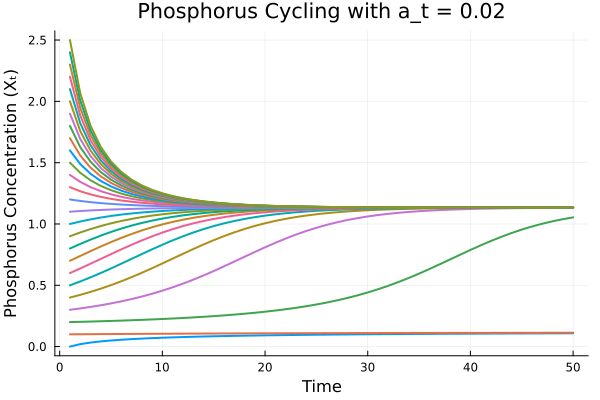

Equilibrium point with a_t = 0.02 at X = 0.11624441966074761
Equilibrium point with a_t = 0.02 at X = 1.1341008852434817


In [61]:
using Plots, Roots

function lake_P_cycling(x, q) # Function for P_recycling, outflow etc
    return x^q / (1 + x^q)
end

lake_P_out(x, b) = b * x

function X_delta(x, a, q, b)
    return a + lake_P_cycling(x, q) - lake_P_out(x, b)
end

function simulate_lake_P(X_ic, T, b, q, a, y) # Simulation
    X = zeros(T)
    X[1] = X_ic
    for t in 2:T
        X[t] = X[t-1] + a[t] + y[t] + lake_P_cycling(X[t-1], q) - lake_P_out(X[t-1], b)
    end
    return X
end

# parameters
T = 50                  
b = 0.5                 
q = 1.5                  
a = fill(0.02, T)    #0.02   
y = fill(0.0, T)        
X_vals = collect(0.0:0.1:2.5) 

simulations = [simulate_lake_P(X_ic, T, b, q, a, y) for X_ic in X_vals] # Simulate P cycling

p = plot(simulations, label=false, ylabel="Phosphorus Concentration (Xₜ)", xlabel="Time", title="Phosphorus Cycling with a_t = 0.02", linewidth=2) # plot

display(p)


equilibrium1 = find_zero(x -> X_delta(x, 0.02, 1.5, 0.5), 0.1) # Finding equilibrium 
equilibrium2 = find_zero(x -> X_delta(x, 0.02, 1.5, 0.5), 1.5)

println("Equilibrium point with a_t = 0.02 at X = $equilibrium1") #  Print equilibrium
println("Equilibrium point with a_t = 0.02 at X = $equilibrium2")


The Equilibrium is at 0.11624441966074761 and 1.1341008852434817. The system continues to stabilize, demonstrating resilience. However, it stabilizes at higher concentrations, which may suggest a reduction in the desired level of resilience.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.